<a href="https://colab.research.google.com/github/python-elidas/BPP/blob/main/Actividad_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
# Carguemos los archivos de drive (en caso de usar colab)
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


***

## 1. Busca y descarga el conjunto de datos “Chess” del repositorio UCI Machine Learning.
## 2. Cárgalo adecuadamente en un Pandas DataFrame


En base a la infromacion del archivo .info, daremos nombre a las columnas:



In [3]:
columns = ['wkc', 'wkr', 'wrc', 'wrr', 'bkf', 'bkr', 'opt']

Partiendo de aquí, carguemos el data set:

In [4]:
try:
  df = pd.read_csv('gdrive/My Drive/krkopt.csv', sep=',', names=columns)
except:
  df = pd.read_csv('krkopt.csv', sep=',', names=columns)

df.head()

,wkc,wkr,wrc,wrr,bkf,bkr,opt
0,a,1,b,3,c,2,draw
1,a,1,c,1,c,2,draw
2,a,1,c,1,d,1,draw
3,a,1,c,1,d,2,draw
4,a,1,c,2,c,1,draw


## 3. Transforma las variables, que son todas categóricas, en numéricas

In [5]:
# Analicemos los tipos de datos de cada atributo:
df.dtypes

wkc    object
wkr     int64
wrc    object
wrr     int64
bkf    object
bkr     int64
opt    object
dtype: object

In [6]:
# Convirtamos todas las varibales a no numericas a numéricas:
df_dum = pd.get_dummies(df)
df_dum.head()

,wkr,wrr,bkr,wkc_a,wkc_b,wkc_c,wkc_d,wrc_a,wrc_b,wrc_c,wrc_d,wrc_e,wrc_f,wrc_g,wrc_h,bkf_a,bkf_b,bkf_c,bkf_d,bkf_e,bkf_f,bkf_g,bkf_h,opt_draw,opt_eight,opt_eleven,opt_fifteen,opt_five,opt_four,opt_fourteen,opt_nine,opt_one,opt_seven,opt_six,opt_sixteen,opt_ten,opt_thirteen,opt_three,opt_twelve,opt_two,opt_zero
0,1,3,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,2,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 4. Aplica el método Filter de selección de características SelectKBest para conseguir un ranking de importancia de características según los estadísticos pertinentes al tipo de variable de entrada y tipo de problema.
## 5. Realiza un gráfico de barras con la importancia de cada característica para cada uno de los estadísticos utilizados. ¿Coinciden las tres características más importantes en todos los casos?

In [7]:
# Importemos la librería:
from sklearn.feature_selection import SelectKBest as SKB
from sklearn.feature_selection import chi2 
from sklearn.feature_selection import mutual_info_classif 
from sklearn.feature_selection import mutual_info_regression

In [8]:
# Antes de nada, vemos cierta infromación relevante:
df_dum.shape

(28056, 41)

In [9]:
# Preparemos las variables...
X = pd.get_dummies(df.drop('opt', axis=1))
col_X = (X.columns)
y = df['opt']

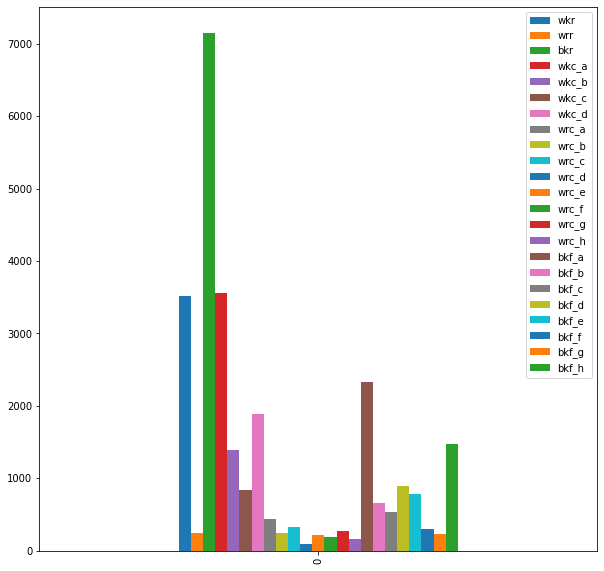

In [10]:
chi_2 = SKB(score_func=chi2, k='all').fit(X, y)
df_chi = pd.DataFrame(chi_2.scores_.reshape((1, 23)), columns=col_X)
df_chi.plot(kind='bar', figsize=(10, 10))

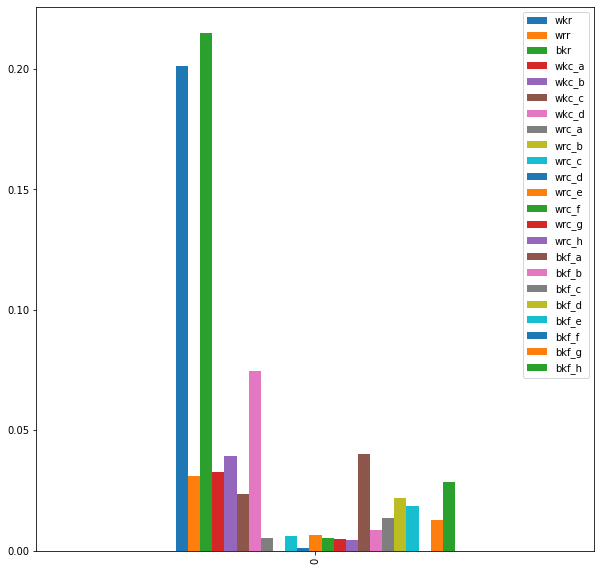

In [11]:
mic = SKB(score_func=mutual_info_classif, k='all').fit(X, y)
df_mic = pd.DataFrame(mic.scores_.reshape((1, 23)), columns=col_X)
df_mic.plot(kind='bar', figsize=(10, 10))

In [12]:
mic = SKB(score_func=mutual_info_regression, k='all').fit(X, y)
df_mic = pd.DataFrame(mic.scores_.reshape((1, 23)), columns=col_X)
df_mic.plot(kind='bar', figsize=(10, 10))

ValueError: ignored